In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as dates
sns.set(rc={'figure.figsize':(11, 4)})

In [25]:
crashesDataframe = pd.read_csv('file:///C:/Users/user/Downloads/archive%20(8)/Airplane_Crashes_and_Fatalities_Since_1908.csv')


In [26]:
# convert Date into Datetime Feature
crashesDataframe.Date = pd.to_datetime(crashesDataframe.Date)

In [27]:
crashesDataframe

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,5263,2009-05-20,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,5264,2009-05-26,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,5265,2009-06-01,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,5266,2009-06-07,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [34]:
ImputedValuesCrashesDataframe = crashesDataframe.copy()
numericData = ImputedValuesCrashesDataframe.select_dtypes(include=np.number).columns.tolist()
missingCounts = crashesDataframe[numericData].isna().sum().sort_values(ascending=False)
missingCounts[missingCounts > 0]

Aboard        22
Ground        22
Fatalities    12
dtype: int64

In [28]:
# we got null values to handle in the next sections!
crashesDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         5268 non-null   int64         
 1   Date          5268 non-null   datetime64[ns]
 2   Time          3049 non-null   object        
 3   Location      5248 non-null   object        
 4   Operator      5250 non-null   object        
 5   Flight #      1069 non-null   object        
 6   Route         3562 non-null   object        
 7   Type          5241 non-null   object        
 8   Registration  4933 non-null   object        
 9   cn/In         4040 non-null   object        
 10  Aboard        5246 non-null   float64       
 11  Fatalities    5256 non-null   float64       
 12  Ground        5246 non-null   float64       
 13  Summary       4878 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(9)
memory usage: 576.3+ KB


In [29]:
# To check null values
crashesDataframe.isnull().sum()

index              0
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [42]:
 # some of the time values starts with a c: or c string. lets remove it to conver time to timestamps
crashesDataframe.loc[crashesDataframe['Time'].str.startswith('c') == True].Time

190     c: 1:00
213     c:17:00
228     c: 2:00
279     c:09:00
1462     c16:50
2599    c:09:00
3390     c14:30
4838    c: 9:40
Name: Time, dtype: object

In [53]:
# since there are only this 4 unique examples, done manually
crashesDataframe.loc[crashesDataframe['Time'].str.startswith('c:') == True,'Time'] = crashesDataframe.loc[crashesDataframe['Time'].str.startswith('c:') == True,'Time'].str.split("c:").str[1]
crashesDataframe.loc[crashesDataframe['Time'].str.startswith('c') == True,'Time'] = crashesDataframe.loc[crashesDataframe['Time'].str.startswith('c') == True,'Time'].str.split("c:").str[1]
crashesDataframe.loc[crashesDataframe['Time'] == "12'20",'Time'] = "12:20"
crashesDataframe.loc[crashesDataframe['Time'] == "18.40",'Time'] = "18:40"
crashesDataframe.loc[crashesDataframe['Time'] == "114:20",'Time'] = "14:20"
crashesDataframe.loc[crashesDataframe['Time'] == "22'08",'Time'] = "22:08"

In [31]:
# Count the missing values in Dirigible column.
crashesDataframe.Type.isnull().sum()

27

In [32]:
# Shape of DataFrame
crashesDataframe.shape

(5268, 14)

In [33]:
# Calculate the percentage of missing values in Dirigible column.
float(100.0*27/5268)

0.5125284738041003

### Drop the records with Dirigible missing

In [9]:
#drop the records with Dirigible missing in df and copy in df1 dataframe.
df1= df[-df.Dirigible.isnull()].copy()
df1.shape

(5239, 14)

In [10]:
# Dimensions of DataFrame
df1.ndim

2

In [11]:
# To find Central location of data from df1
df1.mean()

C:\Users\user\AppData\Local\Temp\ipykernel_2084\3208839689.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.mean()


1        2642.415919
5.0        27.630197
5.0.1      20.107095
0.0         1.603181
dtype: float64

In [12]:
# To find median value of a data set
df1.median()

C:\Users\user\AppData\Local\Temp\ipykernel_2084\3370463481.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.median()


1        2645.0
5.0        13.0
5.0.1       9.0
0.0         0.0
dtype: float64

In [13]:
# To find values that appears most often
df1.mode()

,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Unnamed: 5,Test flight,Dirigible,Unnamed: 8,Unnamed: 9,5.0,5.0.1,0.0,"First U.S. dirigible Akron exploded just offshore at an altitude of 1,000 ft. during a test flight."
0,2,02/28/1973,15:00,"Sao Paulo, Brazil",Aeroflot,-,Training,Douglas DC-3,49,178,2.0,2.0,0.0,Crashed during takeoff.
1,3,06/18/1972,NaN,NaN,Military - U.S. Air Force,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,08/27/1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,08/28/1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,08/31/1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5234,5263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5235,5264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5236,5265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5237,5266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Standard deviation
df1.std()

C:\Users\user\AppData\Local\Temp\ipykernel_2084\1813207459.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.std()


1        1517.008460
5.0        43.160682
5.0.1      33.262191
0.0        54.122898
dtype: float64

In [15]:
# Variance
df1.var()

C:\Users\user\AppData\Local\Temp\ipykernel_2084\2871271835.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.var()


1        2.301315e+06
5.0      1.862844e+03
5.0.1    1.106373e+03
0.0      2.929288e+03
dtype: float64

In [16]:
# Correlation
corr = df1.corr()
corr

,1,5.0,5.0.1,0.0
1,1.000000,0.145249,0.096530,0.031414
5.0,0.145249,1.000000,0.756913,0.023362
5.0.1,0.096530,0.756913,1.000000,0.035307
0.0,0.031414,0.023362,0.035307,1.000000


### To calculate the correlation between the numeric variables we can use heatmap to find correlation among them

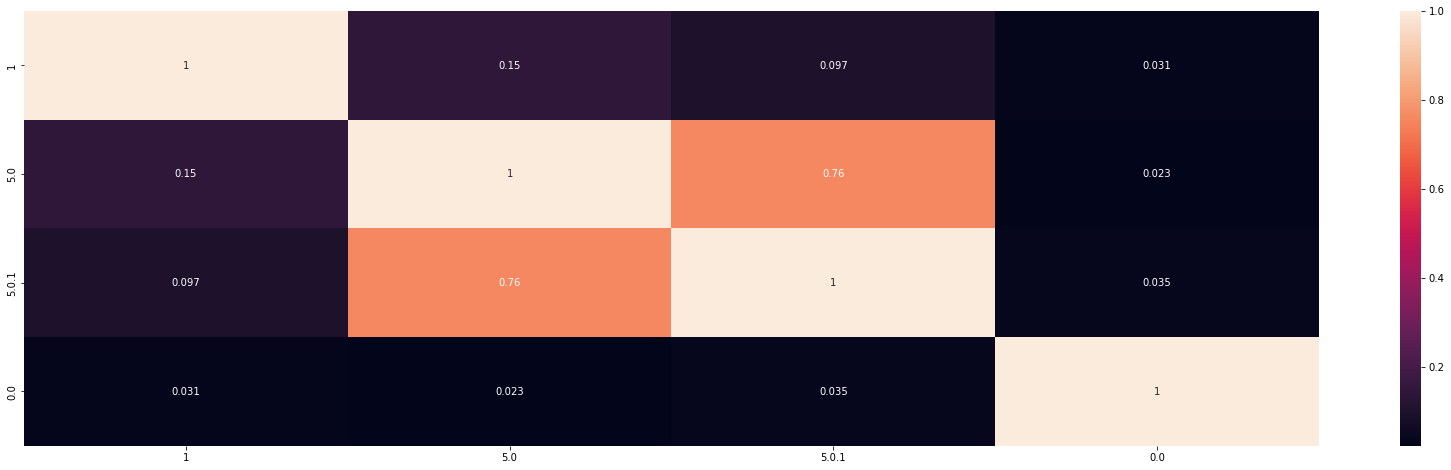

In [17]:
plt.subplots(figsize=(29,8))
corr = df1.corr()
sns.heatmap(corr,annot=True,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values);
plt.show()

In [18]:
# The skew () method calculates the skew for each column
# The skew () method searches column-wise and returns the skew of each row
df1.skew()

C:\Users\user\AppData\Local\Temp\ipykernel_2084\336109200.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.skew()


1        -0.004891
5.0       4.240411
5.0.1     4.943625
0.0      50.233519
dtype: float64

In [19]:
# describe() is used to calculate some statistical data like percentile,mean,standard deviation,count.
df1.describe()

,1,5.0,5.0.1,0.0
count,5239.000000,5219.000000,5229.000000,5219.000000
mean,2642.415919,27.630197,20.107095,1.603181
std,1517.008460,43.160682,33.262191,54.122898
min,2.000000,0.000000,0.000000,0.000000
25%,1332.500000,5.000000,3.000000,0.000000
50%,2645.000000,13.000000,9.000000,0.000000
75%,3954.500000,30.000000,23.000000,0.000000
max,5267.000000,644.000000,583.000000,2750.000000


In [20]:
# Describe the Dirigible column of df1
df1.Dirigible.describe()

count             5239
unique            2444
top       Douglas DC-3
freq               334
Name: Dirigible, dtype: object

### -1 indicates the missing values. Missing value does not always be present as null. How to handle it:
### Objective is:
### you should ignore the missing values in the calculations
### simply make it missing - replace -1 with NaN.
### all summary statistics- mean, median etc. we will ignore the missing values of pdays

In [21]:
# describe the Dirigible column with considering the -1 values
df1.loc[df1.index<0,"Dirigible"] = np.NaN
df1.Dirigible.describe()

count             5239
unique            2444
top       Douglas DC-3
freq               334
Name: Dirigible, dtype: object

In [22]:
# describe the Dirigible variable in df1
df1.Dirigible.describe()

count             5239
unique            2444
top       Douglas DC-3
freq               334
Name: Dirigible, dtype: object

In [23]:
# check the no. of columns & rows
print('The Airplane Crash Dataset contains {:,d} rows & {} columns'.format(df.shape[0], df.shape[1]))

The Airplane Crash Dataset contains 5,266 rows & 14 columns


In [24]:
df.describe().style.background_gradient(cmap='icefire')

,1,5.0,5.0.1,0.0
count,5266.000000,5244.000000,5254.000000,5244.000000
mean,2634.500000,27.563692,20.074800,1.609458
std,1520.307589,43.082354,33.204578,53.998114
min,2.000000,0.000000,0.000000,0.000000
25%,1318.250000,5.000000,3.000000,0.000000
50%,2634.500000,13.000000,9.000000,0.000000
75%,3950.750000,30.000000,23.000000,0.000000
max,5267.000000,644.000000,583.000000,2750.000000


array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'Date'}>],
       [<AxesSubplot:title={'center':'Aboard'}>,
        <AxesSubplot:title={'center':'Fatalities'}>],
       [<AxesSubplot:title={'center':'Ground'}>, <AxesSubplot:>]],
      dtype=object)

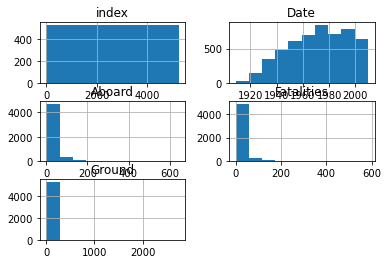

In [36]:
crashesDataframe.hist(bins=10)